In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeans:
    def __init__(self, k=3, max_iter=100, tol=1e-6, random_state=None):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids_ = None
        self.inertia_ = None
        self.labels_ = None

    def fit(self, X):
        X = np.asarray(X, dtype=float)
        rng = np.random.default_rng(self.random_state)
        indices = rng.choice(len(X), self.k, replace=False)
        centroids = X[indices].copy()

        for _ in range(self.max_iter):
            # Assign step
            distances = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)  # (n_samples, k)
            labels = np.argmin(distances, axis=1)

            # Update step
            new_centroids = centroids.copy()
            for i in range(self.k):
                members = X[labels == i]
                if len(members) > 0:
                    new_centroids[i] = members.mean(axis=0)
                # else: keep previous centroid (avoids NaN)

            # Convergence check BEFORE overwriting
            shift = np.linalg.norm(new_centroids - centroids, axis=1).max()
            centroids = new_centroids
            if shift <= self.tol:
                break

        # Save attributes
        self.centroids_ = centroids
        self.labels_ = labels
        # Inertia = sum of squared distances to closest centroid
        d2 = np.sum((X - centroids[labels])**2, axis=1)
        self.inertia_ = float(np.sum(d2))
        return self

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        distances = np.linalg.norm(X[:, None, :] - self.centroids_[None, :, :], axis=2)
        return np.argmin(distances, axis=1)




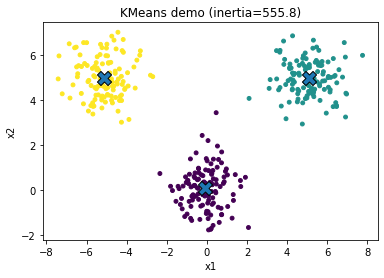

In [3]:
np.random.seed(42)
n_per = 120
means = np.array([[0, 0], [5, 5], [-5, 5]], dtype=float)
cov = np.array([[0.8, 0.0],[0.0, 0.8]])
X = np.vstack([
    np.random.multivariate_normal(mean=means[0], cov=cov, size=n_per),
    np.random.multivariate_normal(mean=means[1], cov=cov, size=n_per),
    np.random.multivariate_normal(mean=means[2], cov=cov, size=n_per),
])

kmeans = KMeans(k=3, max_iter=200, tol=1e-4, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.centroids_

# Plot
plt.figure()
plt.scatter(X[:,0], X[:,1], s=15, c=labels)  # default colors
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, edgecolor='k')
plt.title(f"KMeans demo (inertia={kmeans.inertia_:.1f})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()